In [1]:
import xarray as xr
xr.set_options(display_style="html")
import fsspec
from fsspec.implementations.zip import ZipFileSystem

In [2]:
url = "https://download.pangaea.de/dataset/940149/files/paleo_ensemble_geo_2022.zip"
from fsspec.implementations.zip import ZipFileSystem
fs = ZipFileSystem(url)

### Load the first and second inputs

In [2]:
# save them to netcdfs locally to speed up testing

#import xarray as xr
#xr.set_options(display_style="html")

#fp1 = fs.open('geo_data/pism1.0_paleo06_6000/geometry_paleo_1ka.nc') 
#input1 = xr.open_dataset(fp1)
#input1.to_netcdf('paleo-pism-6000.nc')

#fp2 = fs.open('geo_data/pism1.0_paleo06_6001/geometry_paleo_1ka.nc') 
#input2 = xr.open_dataset(fp2)
#input2.to_netcdf('paleo-pism-6001.nc')

In [3]:
import xarray as xr
ds_6000 = xr.open_dataset('paleo-pism-6000.nc')
ds_6001 = xr.open_dataset('paleo-pism-6001.nc')

In [5]:
ds_6000

<xarray.Dataset>
Dimensions:      (time: 125, y: 381, x: 381, nv: 2)
Coordinates:
  * time         (time) object -123999-01-01 00:00:00 ... 0001-01-01 00:00:00
  * x            (x) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
  * y            (y) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
Dimensions without coordinates: nv
Data variables:
    bmelt        (time, y, x) float32 ...
    thk          (time, y, x) float32 ...
    time_bounds  (time, nv) timedelta64[ns] ...
    topg         (time, y, x) float32 ...
Attributes:
    NCO:      netCDF Operators version 4.7.8 (Homepage = http://nco.sf.net, C...
    history:  Tue Oct 19 14:10:39 2021: ncatted -a history_of_appended_files,...

In [9]:
ds_6000.nbytes*256/1e9 *5/3
 

92.90692096

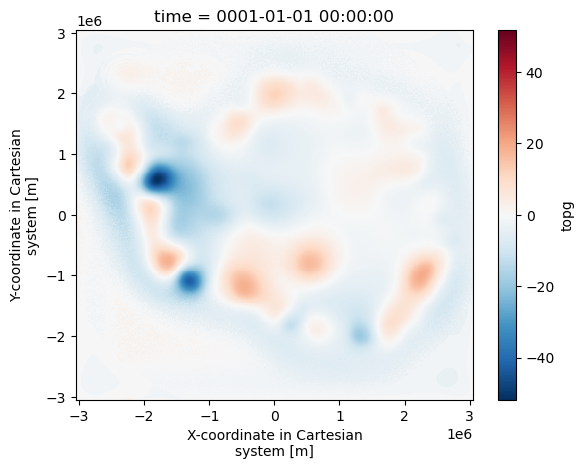

In [6]:
thick_diff_1 = ds_6000.topg[-1] - ds_6001.topg[-1]
thick_diff_1.plot();

## Run a pruned version of the recipe locally, outisde the NB


In [10]:
%run recipe.py

from pangeo_forge_recipes.recipes import setup_logging
setup_logging("DEBUG")

recipe_pruned = recipe.copy_pruned()
run_function = recipe_pruned.to_function()
run_function()

pangeo_forge_recipes.recipes.xarray_zarr - INFO - Caching input 'Index({DimIndex(name='id', index=0, sequence_len=2, operation=<CombineOp.CONCAT: 2>)})'
pangeo_forge_recipes.storage - INFO - Caching file 'zip://geo_data/pism1.0_paleo06_6000/geometry_paleo_1ka.nc::https://download.pangaea.de/dataset/940149/files/paleo_ensemble_geo_2022.zip'
pangeo_forge_recipes.storage - INFO - Copying remote file 'zip://geo_data/pism1.0_paleo06_6000/geometry_paleo_1ka.nc::https://download.pangaea.de/dataset/940149/files/paleo_ensemble_geo_2022.zip' to cache
pangeo_forge_recipes.storage - DEBUG - entering fs.open context manager for /tmp/tmpcsk8k8d3/kjYF8JS2/4b699984c60f760669a103176a6b1dcd-zip_geo_data_pism1.0_paleo06_6000_geometry_paleo_1ka.nc_https_download.pangaea.de_dataset_940149_files_paleo_ensemble_geo_2022.zip
pangeo_forge_recipes.storage - DEBUG - FSSpecTarget.open yielding <fsspec.implementations.local.LocalFileOpener object at 0x7fb32a706700>
pangeo_forge_recipes.storage - DEBUG - _copy_btw_

/srv/conda/envs/notebook/lib/python3.9/site-packages/pangeo_forge_recipes/recipes/xarray_zarr.py:115: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  return xr.open_zarr(target.get_mapper())


pangeo_forge_recipes.recipes.xarray_zarr - DEBUG - <xarray.Dataset>
Dimensions:      (id: 1, time: 125, y: 381, x: 381, nv: 2)
Coordinates:
  * time         (time) object -123999-01-01 00:00:00 ... 0001-01-01 00:00:00
  * x            (x) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
  * y            (y) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
  * id           (id) <U4 '6000'
Dimensions without coordinates: nv
Data variables:
    bmelt        (id, time, y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    thk          (id, time, y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    time_bounds  (id, time, nv) timedelta64[ns] 64852 days 05:16:13.844045824...
    topg         (id, time, y, x) float32 -4.998e+03 -5e+03 ... -5e+03
Attributes:
    NCO:      netCDF Operators version 4.7.8 (Homepage = http://nco.sf.net, C...
    history:  Tue Oct 19 14:10:39 2021: ncatted -a history_of_appended_files,...
pangeo_forge_recipes.recipes.xarray_zarr - INFO - Combining inputs for

### Import the zarr created locally

In [11]:
import xarray as xr
pism_zarr_local = xr.open_zarr(recipe_pruned.target_mapper, consolidated=True)
pism_zarr_local

<xarray.Dataset>
Dimensions:      (id: 2, time: 125, y: 381, x: 381, nv: 2)
Coordinates:
  * id           (id) <U4 '6000' '6001'
  * time         (time) object -123999-01-01 00:00:00 ... 0001-01-01 00:00:00
  * x            (x) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
  * y            (y) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
Dimensions without coordinates: nv
Data variables:
    bmelt        (id, time, y, x) float32 dask.array<chunksize=(1, 125, 381, 381), meta=np.ndarray>
    thk          (id, time, y, x) float32 dask.array<chunksize=(1, 125, 381, 381), meta=np.ndarray>
    time_bounds  (id, time, nv) timedelta64[ns] dask.array<chunksize=(1, 125, 2), meta=np.ndarray>
    topg         (id, time, y, x) float32 dask.array<chunksize=(1, 125, 381, 381), meta=np.ndarray>
Attributes:
    NCO:      netCDF Operators version 4.7.8 (Homepage = http://nco.sf.net, C...
    history:  Tue Oct 19 14:10:39 2021: ncatted -a history_of_appended_files,...

#### test that the two different ensemble members are different


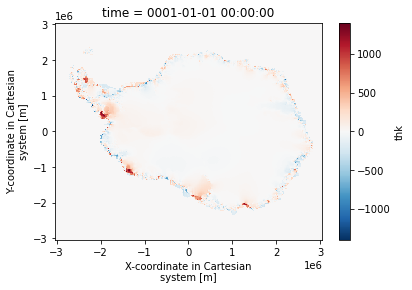

In [12]:
thick_diff_2 = pism_zarr_local.thk[0,-1] - pism_zarr_local.thk[1,-1]
thick_diff_2.plot();

### Load the zarr created in the cloud https://pangeo-forge.org/dashboard/recipe-run/1041

In [13]:
import fsspec
import xarray as xr

dataset_public_url = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge-test/prod/recipe-run-1041/pangeo-forge/staged-recipes/paleo-pism-stacked.zarr'
mapper = fsspec.get_mapper(dataset_public_url)
pism_zarr_cloud = xr.open_zarr(mapper, consolidated=True)
pism_zarr_cloud

<xarray.Dataset>
Dimensions:      (id: 2, time: 125, y: 381, x: 381, nv: 2)
Coordinates:
  * id           (id) <U4 '6000' '6001'
  * time         (time) object -123999-01-01 00:00:00 ... 0001-01-01 00:00:00
  * x            (x) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
  * y            (y) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
Dimensions without coordinates: nv
Data variables:
    bmelt        (id, time, y, x) float32 dask.array<chunksize=(1, 125, 381, 381), meta=np.ndarray>
    thk          (id, time, y, x) float32 dask.array<chunksize=(1, 125, 381, 381), meta=np.ndarray>
    time_bounds  (id, time, nv) timedelta64[ns] dask.array<chunksize=(1, 125, 2), meta=np.ndarray>
    topg         (id, time, y, x) float32 dask.array<chunksize=(1, 125, 381, 381), meta=np.ndarray>
Attributes:
    NCO:      netCDF Operators version 4.7.8 (Homepage = http://nco.sf.net, C...
    history:  Tue Oct 19 14:10:39 2021: ncatted -a history_of_appended_files,...

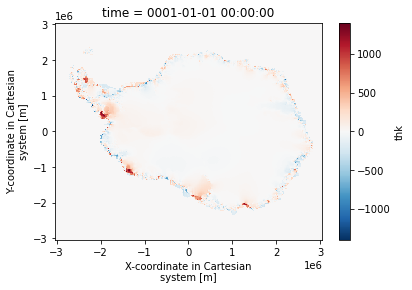

In [14]:
thick_diff_2 = pism_zarr_cloud.thk[0,-1] - pism_zarr_cloud.thk[1,-1]
thick_diff_2.plot();

In [15]:
ds_6000

<xarray.Dataset>
Dimensions:      (time: 125, y: 381, x: 381, nv: 2)
Coordinates:
  * time         (time) object -123999-01-01 00:00:00 ... 0001-01-01 00:00:00
  * x            (x) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
  * y            (y) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
Dimensions without coordinates: nv
Data variables:
    bmelt        (time, y, x) float32 ...
    thk          (time, y, x) float32 ...
    time_bounds  (time, nv) timedelta64[ns] ...
    topg         (time, y, x) float32 ...
Attributes:
    NCO:      netCDF Operators version 4.7.8 (Homepage = http://nco.sf.net, C...
    history:  Tue Oct 19 14:10:39 2021: ncatted -a history_of_appended_files,...

In [16]:
pism_zarr_cloud

<xarray.Dataset>
Dimensions:      (id: 2, time: 125, y: 381, x: 381, nv: 2)
Coordinates:
  * id           (id) <U4 '6000' '6001'
  * time         (time) object -123999-01-01 00:00:00 ... 0001-01-01 00:00:00
  * x            (x) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
  * y            (y) float64 -3.04e+06 -3.024e+06 ... 3.024e+06 3.04e+06
Dimensions without coordinates: nv
Data variables:
    bmelt        (id, time, y, x) float32 dask.array<chunksize=(1, 125, 381, 381), meta=np.ndarray>
    thk          (id, time, y, x) float32 dask.array<chunksize=(1, 125, 381, 381), meta=np.ndarray>
    time_bounds  (id, time, nv) timedelta64[ns] dask.array<chunksize=(1, 125, 2), meta=np.ndarray>
    topg         (id, time, y, x) float32 dask.array<chunksize=(1, 125, 381, 381), meta=np.ndarray>
Attributes:
    NCO:      netCDF Operators version 4.7.8 (Homepage = http://nco.sf.net, C...
    history:  Tue Oct 19 14:10:39 2021: ncatted -a history_of_appended_files,...

0001-01-01 00:00:00


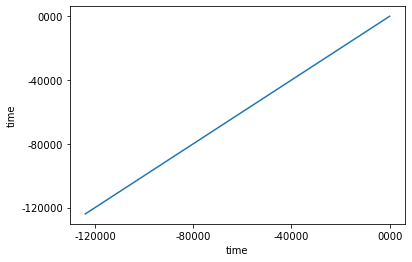

In [20]:
print(pism_zarr_cloud.time[-1].values)
pism_zarr_cloud.time.plot()

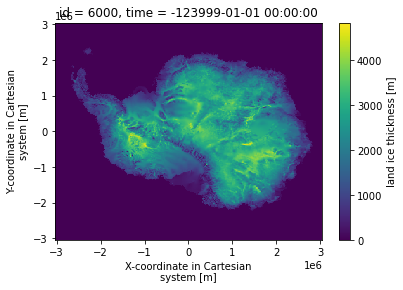

In [26]:
pism_zarr_cloud.thk[0,0].plot()

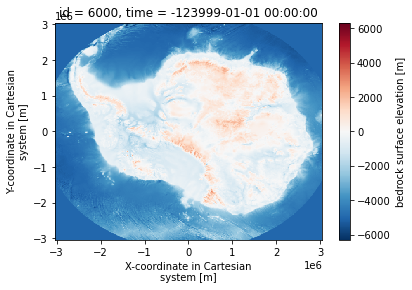

In [27]:
pism_zarr_cloud.topg[0,0].plot()

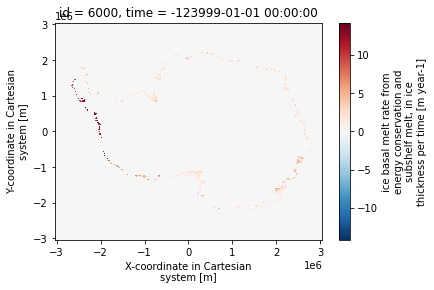

In [28]:
pism_zarr_cloud.bmelt[0,0].plot()

In [31]:
mean_thk = pism_zarr_cloud.thk.mean()

In [30]:
from dask.distributed import Client
import dask_gateway

gateway = dask_gateway.Gateway()
cluster = gateway.new_cluster()
cluster.scale(4)
client = Client(cluster)
cluster

In [43]:
%%time
mean_thk_SS_1 = pism_zarr_cloud.thk.isel(time=-1).max(dim=[ 'y', 'x'])
mean_thk_SS_1.load();


CPU times: user 19.4 ms, sys: 2.03 ms, total: 21.4 ms
Wall time: 3.89 s


<xarray.DataArray 'thk' (id: 2)>
array([5009.9995, 5007.9995], dtype=float32)
Coordinates:
  * id       (id) <U4 '6000' '6001'
    time     object 0001-01-01 00:00:00

In [45]:
cluster.shutdown()

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask_gateway/client.py:1014: RuntimeWarning: coroutine 'rpc.close_rpc' was never awaited
  self.scheduler_comm.close_rpc()
2022-08-25 01:19:03,316 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
Exception in callback None()
handle: <Handle cancelled>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/tornado/iostream.py", line 1391, in _do_ssl_handshake
    self.socket.do_handshake()
  File "/srv/conda/envs/notebook/lib/python3.9/ssl.py", line 1310, in do_handshake
    self._sslobj.do_handshake()
ssl.SSLEOFError: EOF occurred in violation of protocol (_ssl.c:1129)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/srv/conda/envs/notebook/lib/py